# Intoduction

This project aims to predict students' average exam scores based on various factors such as gender, parental education, lunch type, and test preparation course. The goal is to analyze how these factors influence academic performance using machine learning models.

**Key Metrics : Mean Absolute Error (MAE)**

To evaluate the model’s performance, I use Mean Absolute Error (MAE): MAE measures how far predictions are from actual values, on average.

Lower MAE values indicate better model accuracy.

**Categorical Features Used for Prediction :**

The dataset contains several categorical features that influence student performance:

* Gender : male or female
* Race/Ethnicity : Group classifications (e.g., group A, group B, group C)
* Parental Level of Education : Education levels such as some college, bachelor’s degree, high school, etc.
* Lunch Type : standard or free/reduced
* Test Preparation Course : completed or none

Since categorical features are not numerical, we apply One-Hot Encoding (OHE) to convert them into numerical values that can be used in machine learning models.

**How This Project Works :**

1. Preprocessing the Data:

    * Convert categorical variables into numerical form using One-Hot Encoding.

    * Normalize numerical features if necessary.

2. Model Training: Train a Neural Network, Linear Regression, and Random Forest model to predict exam scores.

3. Performance Evaluation: Compare models using MAE to determine the most accurate.

4. Feature Importance Analysis: Use SHAP values to interpret which factors impact predictions the most.

### Import

In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import shap
import matplotlib.pyplot as plt

### Dataset

In [9]:
df = pd.read_csv('studentsPerformance.csv')

In [10]:
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis = 1)
df.drop(columns = ['math score', 'reading score', 'writing score'], inplace = True)

In [11]:
categorical_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
numerical_features = []

In [12]:
preprocessor = ColumnTransformer(
    transformers=[
        ('category', OneHotEncoder(handle_unknown = 'ignore'), categorical_features)
    ]
)

In [13]:
X = df.drop(columns=['average_score'])
y = df['average_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X (features) → Contains all data except average_score.

y (target variable) → Contains only average_score.

Note : I use 80% of the data as training data and 20% of the data for testing data


### TensorFlow Neural Network

In [16]:
X_train = preprocessor.fit_transform(X_train).toarray()
X_test = preprocessor.transform(X_test).toarray()

In [17]:
model = keras.Sequential([
    keras.Input(shape = (X_train.shape[1],)),  # explicit Input layer
    layers.Dense(64, activation = 'relu'),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(1)  # output layer for regression
])

In [18]:
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

### Train The Model

In [20]:
model.fit(X_train, y_train, epochs = 50, validation_data = (X_test, y_test), batch_size = 10)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4576.4248 - mae: 66.1515 - val_loss: 2913.5498 - val_mae: 51.9539
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2035.5085 - mae: 40.9426 - val_loss: 230.0432 - val_mae: 11.8734
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 197.1463 - mae: 11.4852 - val_loss: 193.1003 - val_mae: 11.0675
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 169.6246 - mae: 10.4043 - val_loss: 181.5975 - val_mae: 10.7138
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 155.2780 - mae: 10.0556 - val_loss: 182.8790 - val_mae: 10.6410
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 151.0123 - mae: 9.8991 - val_loss: 179.7356 - val_mae: 10.5749
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 138.4921 - mae: 9.5929 - val_loss: 178.3962 - val_mae: 10.5926
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 148.5454 - mae: 9.8563 - val_loss: 178.8131 - val_mae: 10.5223
Epoch 9/50
80/80 ━━━━━━━

### Evaluate TensorFlow Neural Network Model

In [22]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE (Neural Network): {mae:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 208.1944 - mae: 11.2490  
Test MAE (Neural Network): 10.66


### Shap Sumarry Using Neural Network Model

PermutationExplainer explainer: 201it [00:13,  4.87it/s]                                                               


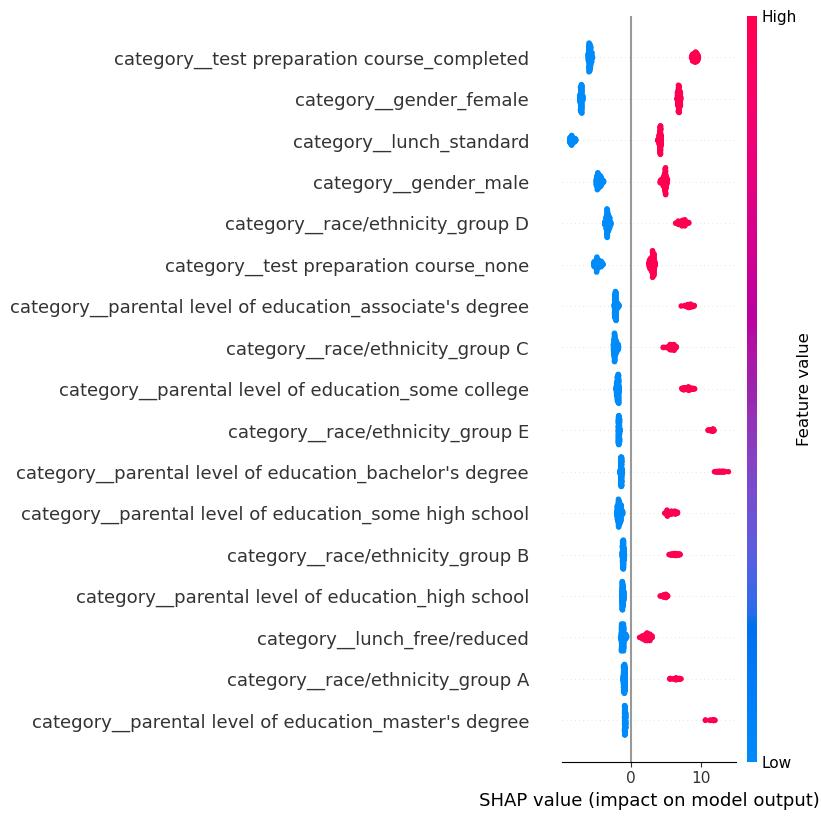

In [24]:
X_test_array = np.array(X_test).astype(np.float32)  # ensure correct data type

explainer = shap.Explainer(model, X_test_array)
shap_values = explainer(X_test_array)

# plot SHAP summary
feature_names = preprocessor.get_feature_names_out()
shap.summary_plot(shap_values, X_test_array, feature_names = feature_names)

### Evaluate Linear Regression Model

In [26]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)
lr_mae = mean_absolute_error(y_test, lr_preds)
print(f"Test MAE (Linear Regression): {lr_mae:.2f}")

Test MAE (Linear Regression): 10.61


### Evaluate Random Forest

In [28]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_preds)
print(f"Test MAE (Random Forest): {rf_mae:.2f}")

Test MAE (Random Forest): 11.50


### Shap Sumarry Using Random Forest or Linear Regression

PermutationExplainer explainer: 201it [00:35,  4.24it/s]                                                               


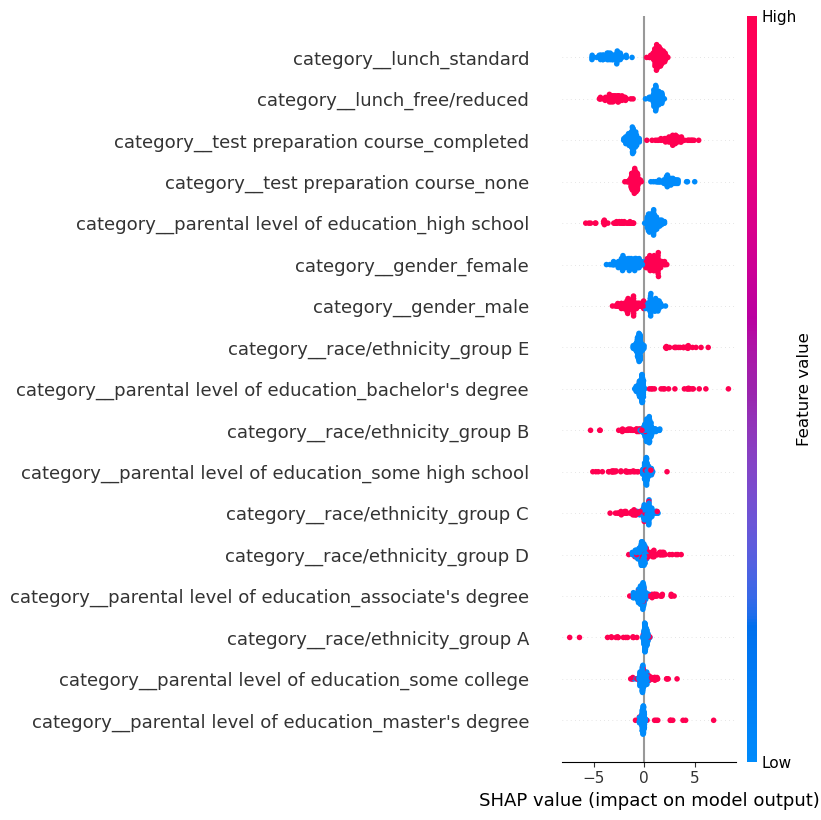

In [30]:
explainer = shap.Explainer(rf.predict, X_train) # we can change rf to lr to use linear regression model
shap_values = explainer(X_test)

# get transformed feature names
feature_names = preprocessor.get_feature_names_out()

# plot SHAP summary
shap.summary_plot(shap_values, X_test, feature_names = feature_names)

**Explanation for SHAP chart :**

The SHAP Summary Plot helps explain how different features affect the model’s predictions. Here’s how to understand it:

1. Y-Axis (Feature Names): Each row represents a different feature (e.g., gender, parental education, etc.).

2. X-Axis (SHAP Value):

   * Positive SHAP values: The feature increases the predicted score.

    * Negative SHAP values: The feature decreases the predicted score.

3. Color (Feature Value Representation):

    * Red points indicate high feature values (e.g., completing a test prep course).

    * Blue points indicate low feature values (e.g., not completing a test prep course).
  

**How to Interpret the Impact :**

If a feature has mostly red points on the right, high values of this feature increase the predicted score.

If a feature has mostly blue points on the left, low values of this feature decrease the predicted score.

**Example Interpretation :**

* If test preparation completion (a feature) has red points mostly on the right, students who completed test prep tend to have higher scores.

* If lunch type (free/reduced) has blue points mostly on the left, it suggests that students on reduced lunch plans might score lower.

**Features at the top are the most important in predicting exam scores.**


### Prediction Function

In [33]:
# using random forest
def predict_score_rf(input_data):
    input_df = pd.DataFrame([input_data])
    input_array = preprocessor.transform(input_df).toarray()
    prediction = rf.predict(input_array)
    return prediction[0]

# using linear regression
def predict_score_lr(input_data):
    input_df = pd.DataFrame([input_data])
    input_array = preprocessor.transform(input_df).toarray() 
    prediction = lr.predict(input_array)
    return prediction[0]

# using neural network model
def predict_score_nn(input_data):
    input_df = pd.DataFrame([input_data])
    input_array = preprocessor.transform(input_df).toarray().astype(np.float32)
    prediction = model.predict(input_array)
    return prediction[0][0] 

Note : I use np.float32 for the Neural Network (NN) prediction function because TensorFlow models require consistent data types, and float32 is the default type for TensorFlow operations.

### Example Prediction

In [36]:
sample_student = {
    'gender': 'female',
    'race/ethnicity': 'group C',
    'parental level of education': "bachelor's degree",
    'lunch': 'standard',
    'test preparation course': 'none'
}

# Predict using all three models
pred_rf = predict_score_rf(sample_student)
pred_lr = predict_score_lr(sample_student)
pred_nn = predict_score_nn(sample_student)

print(f"Random Forest Prediction: {pred_rf:.2f}")
print(f"Linear Regression Prediction: {pred_lr:.2f}")
print(f"Neural Network Prediction: {pred_nn:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Random Forest Prediction: 78.65
Linear Regression Prediction: 73.00
Neural Network Prediction: 72.80
